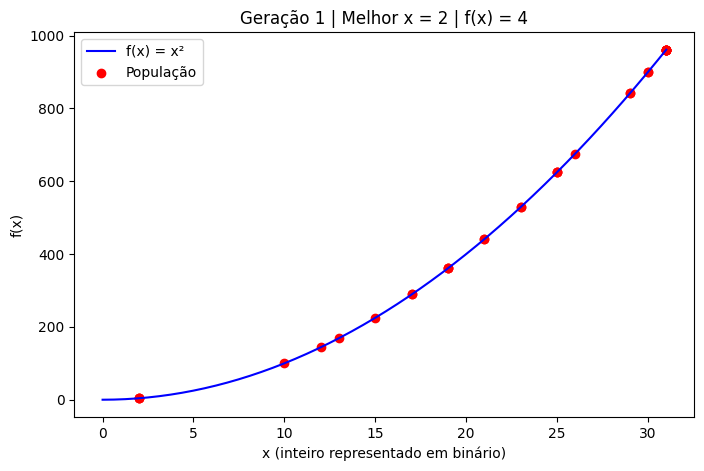

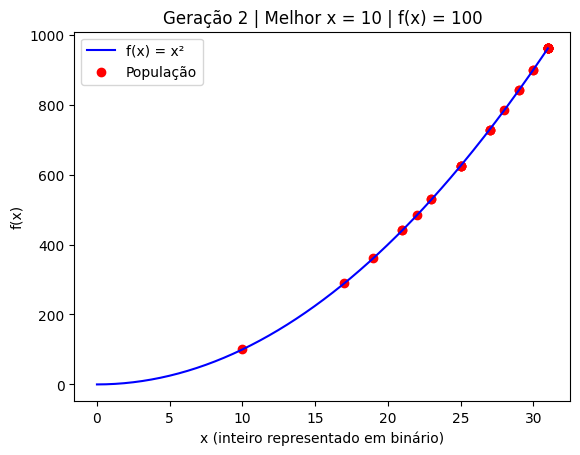

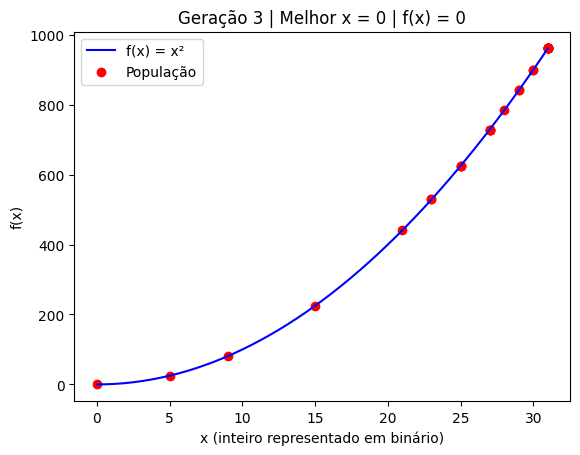

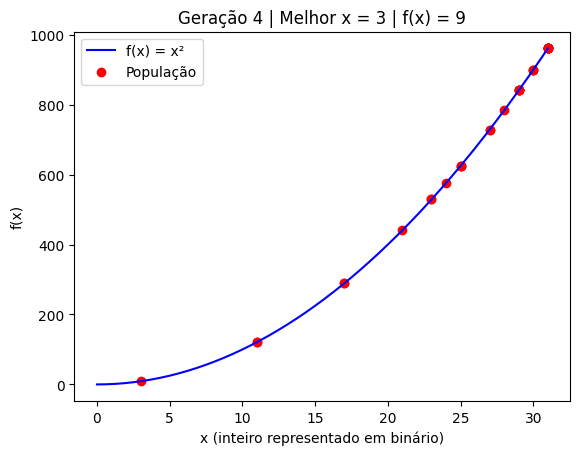

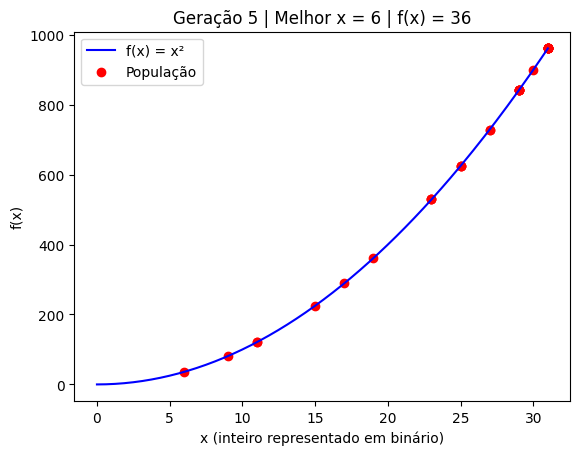

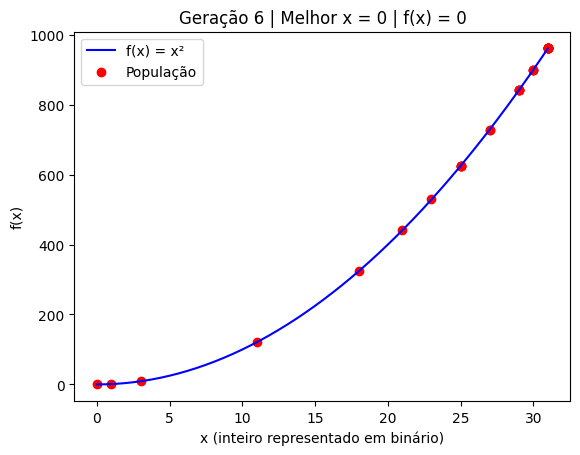

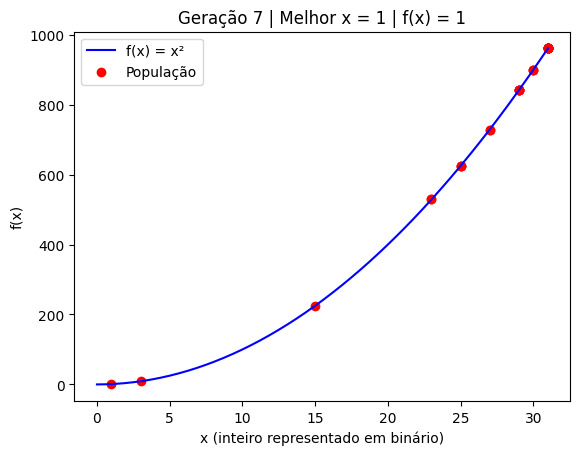

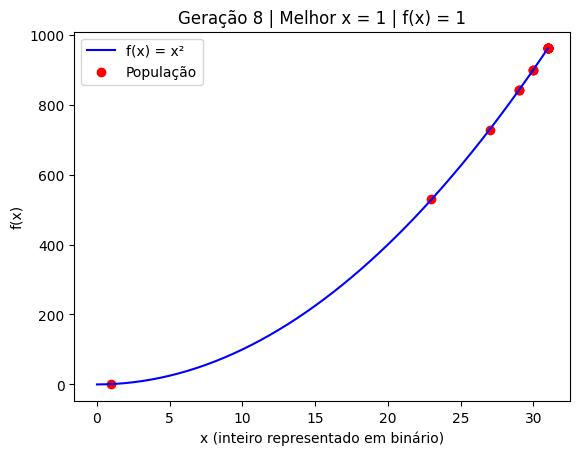

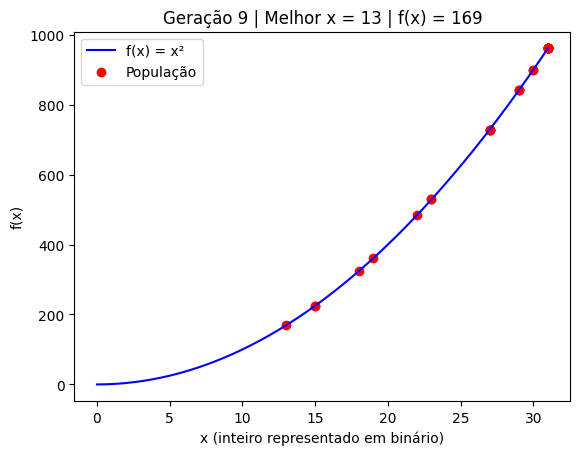

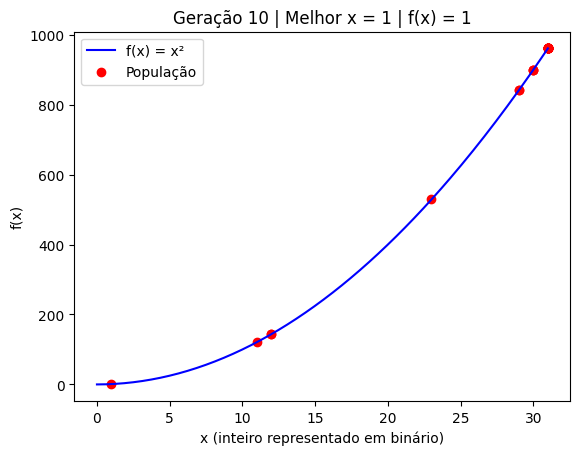

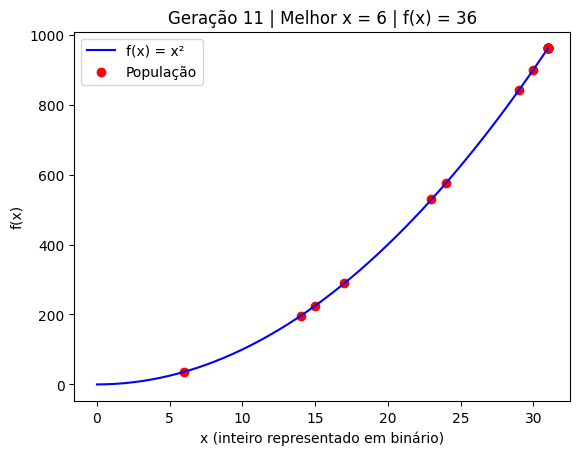

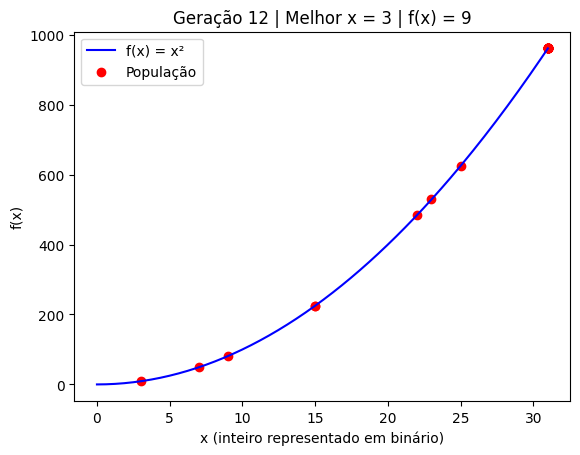

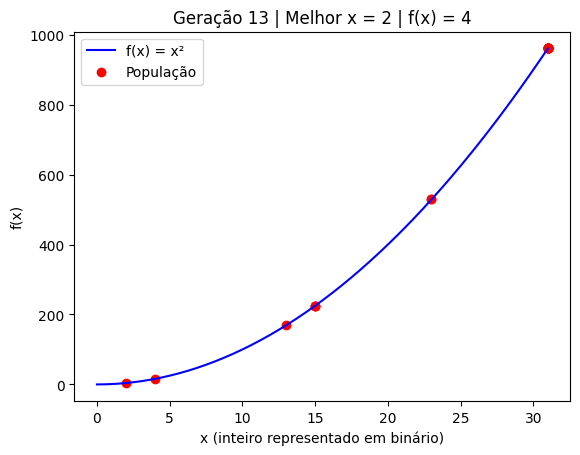

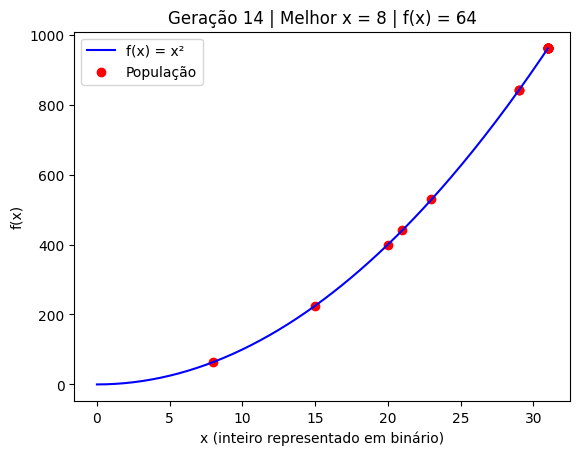

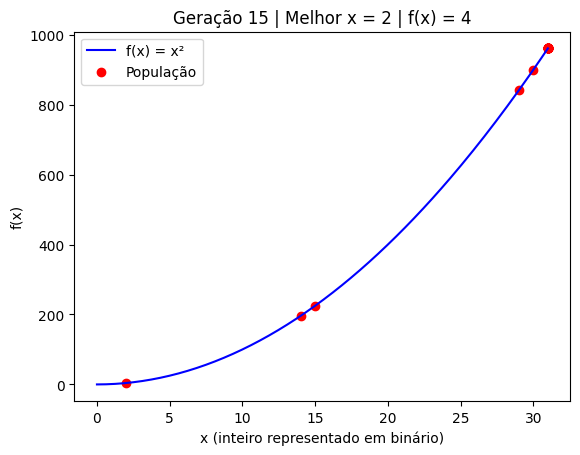

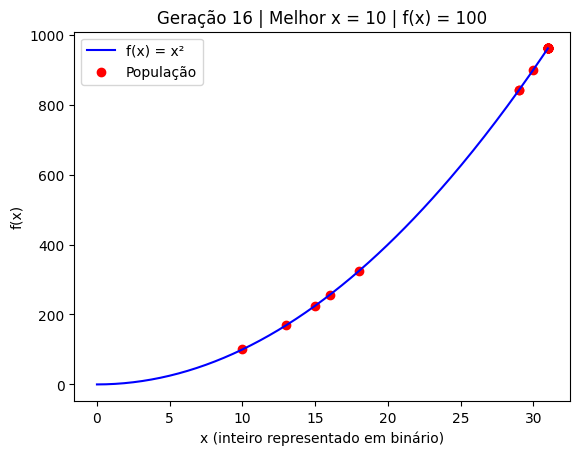

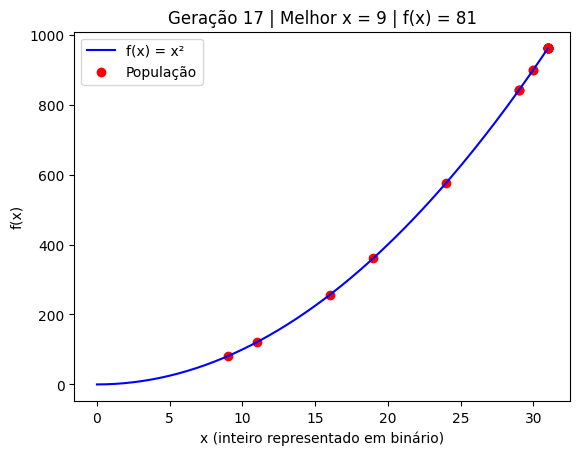

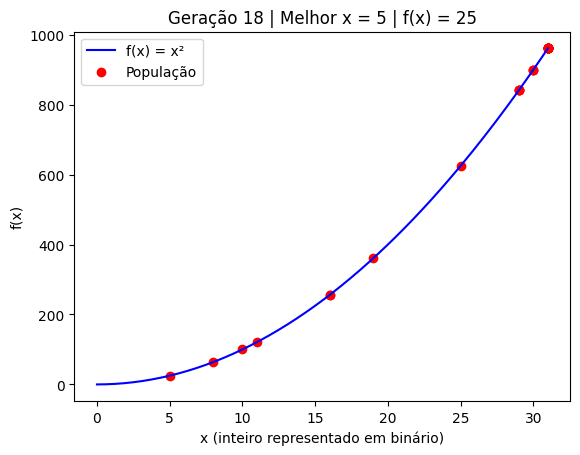

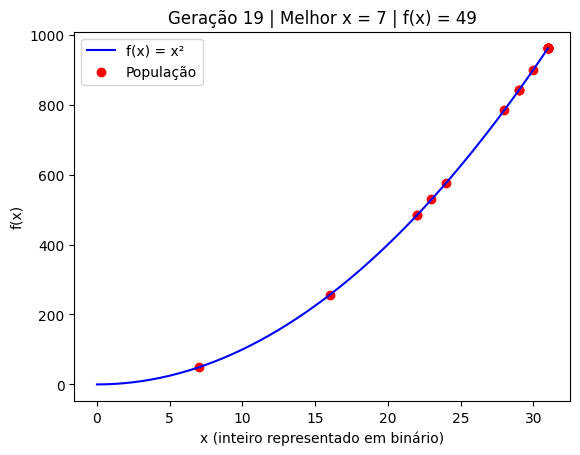

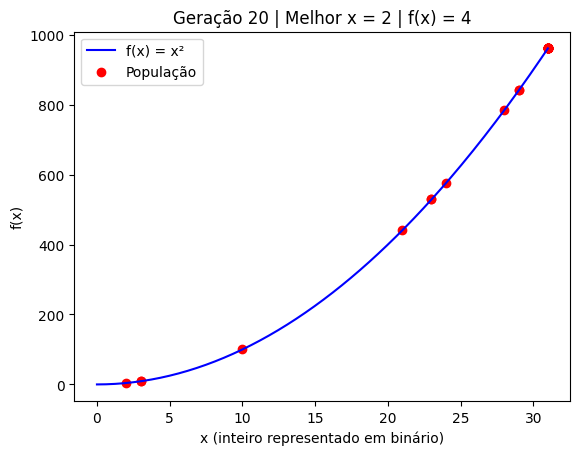

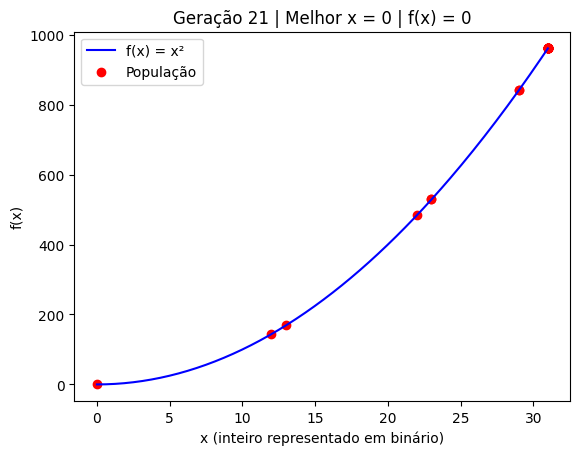

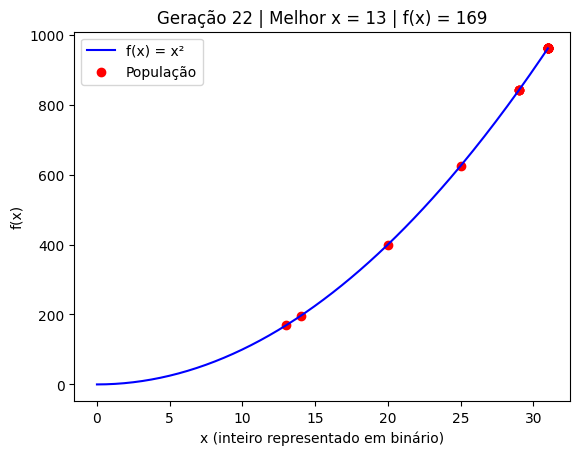

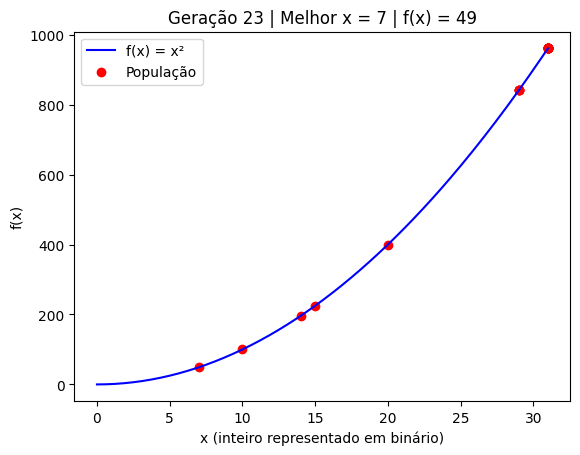

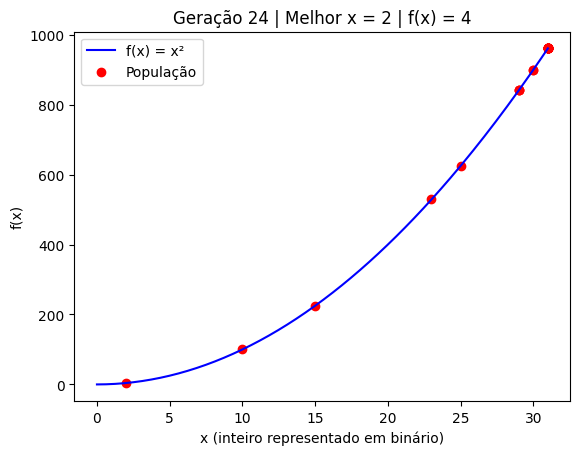

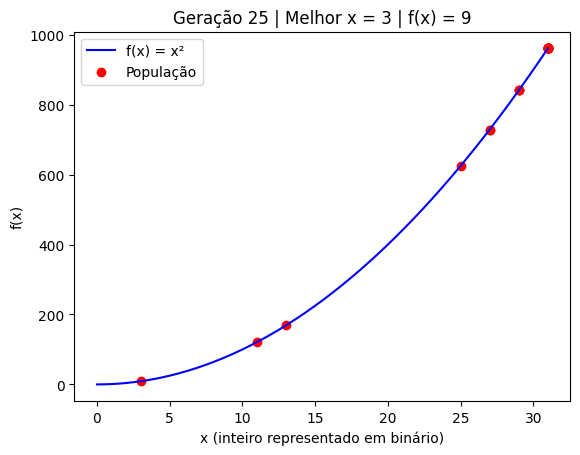

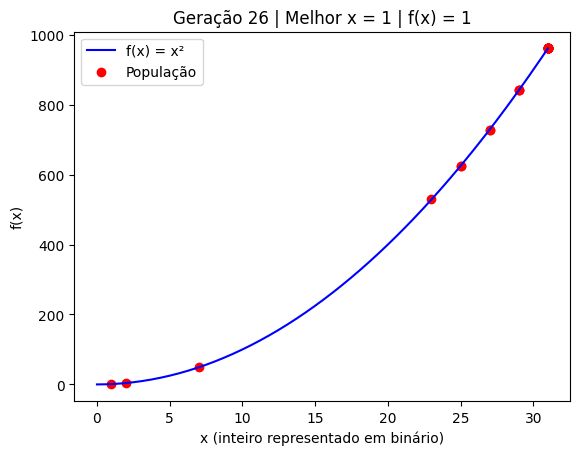

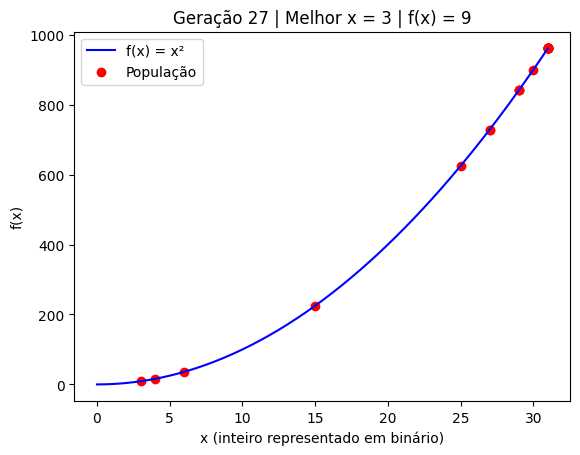

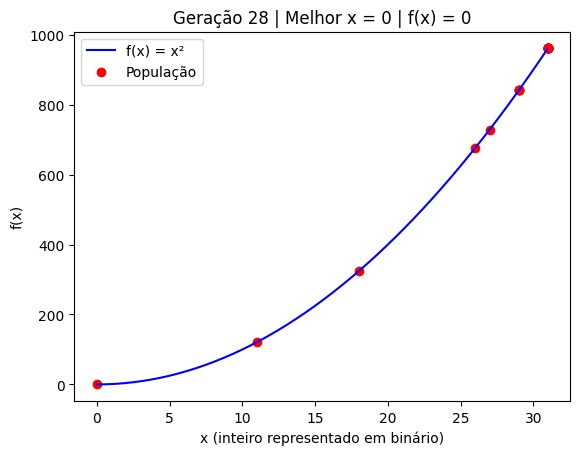

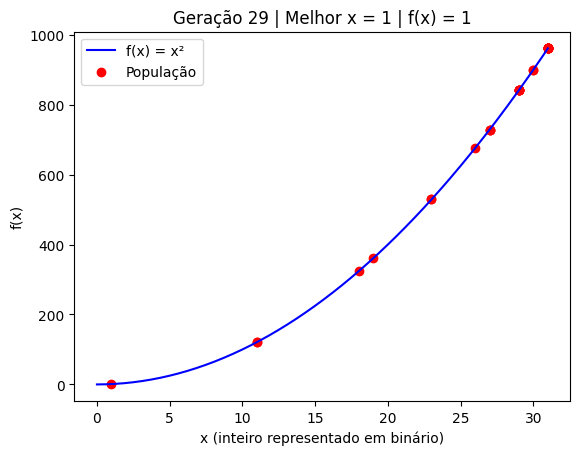

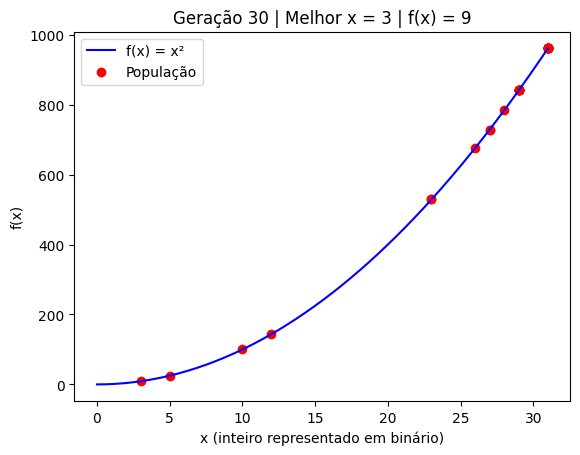


Melhor solução encontrada:
x = 3, f(x) = 9


In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

# Parâmetros do algoritmo
TAM_POP = 32
NUM_BITS = 5           # Representa valores entre 0 e 31
TAXA_CROSS = 0.7
TAXA_MUT = 0.01
NUM_GER = 30
PREDACAO = 0.15

# Função de avaliação (maximizar f(x) = x²)
def fitness(individuo):
    x = int(''.join(map(str, individuo)), 2)
    return x**2

# Criação da população inicial
def cria_populacao():
    return [[random.randint(0, 1) for _ in range(NUM_BITS)] for _ in range(TAM_POP)]

# Seleção por roleta
def selecao_roleta(populacao, fitnesses):
    soma_fit = sum(fitnesses)
    pick = random.uniform(0, soma_fit)
    atual = 0
    for ind, fit in zip(populacao, fitnesses):
        atual += fit
        if atual >= pick:
            return ind
    return populacao[-1]

# Crossover de um ponto
def crossover(pai1, pai2):
    if random.random() < TAXA_CROSS:
        ponto = random.randint(1, NUM_BITS - 1)
        filho1 = pai1[:ponto] + pai2[ponto:]
        filho2 = pai2[:ponto] + pai1[ponto:]
        return filho1, filho2
    return pai1[:], pai2[:]

# Mutação bit a bit
def mutacao(individuo):
    for i in range(len(individuo)):
        if random.random() < TAXA_MUT:
            individuo[i] = 1 - individuo[i]

# Predação (15% da população substituída)
def predacao(populacao):
    qtd = int(PREDACAO * len(populacao))
    for _ in range(qtd):
        i = random.randrange(len(populacao))
        populacao[i] = [random.randint(0, 1) for _ in range(NUM_BITS)]

# Função para converter população em valores x
def decodifica_pop(populacao):
    return [int(''.join(map(str, ind)), 2) for ind in populacao]

# Plot dinâmico
def plota_geracao(populacao, geracao, melhor_x, melhor_f):
    plt.clf()
    xs = np.linspace(0, 31, 200)
    ys = xs**2
    plt.plot(xs, ys, color='blue', label='f(x) = x²')
    plt.scatter(decodifica_pop(populacao),
                [fitness(ind) for ind in populacao],
                color='red', label='População')
    plt.title(f"Geração {geracao+1} | Melhor x = {melhor_x} | f(x) = {melhor_f}")
    plt.xlabel("x (inteiro representado em binário)")
    plt.ylabel("f(x)")
    plt.legend()
    plt.pause(0.3)

# Algoritmo principal
def algoritmo_genetico():
    populacao = cria_populacao()
    plt.ion()
    plt.figure(figsize=(8,5))

    for geracao in range(NUM_GER):
        fitnesses = [fitness(ind) for ind in populacao]
        nova_pop = []

        while len(nova_pop) < TAM_POP:
            pai1 = selecao_roleta(populacao, fitnesses)
            pai2 = selecao_roleta(populacao, fitnesses)
            filho1, filho2 = crossover(pai1, pai2)
            mutacao(filho1)
            mutacao(filho2)
            nova_pop.append(filho1)
            if len(nova_pop) < TAM_POP:
                nova_pop.append(filho2)

        populacao = nova_pop
        predacao(populacao)

        melhor = min(populacao, key=fitness)
        melhor_x = int(''.join(map(str, melhor)), 2)
        melhor_f = melhor_x**2

        plota_geracao(populacao, geracao, melhor_x, melhor_f)

    plt.ioff()
    plt.show()

    print("\nMelhor solução encontrada:")
    print(f"x = {melhor_x}, f(x) = {melhor_f}")

algoritmo_genetico()
